In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Stages of the Project.
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvements
7. Website
8. Deploy

**Data Cleaning**

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
## missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
## check for duplicates
df.duplicated().sum()

np.int64(403)

In [ ]:
## remove the duplicates
df.drop_duplicates(keep = 'first' , inplace=True)

In [ ]:
df.head(1)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."


**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


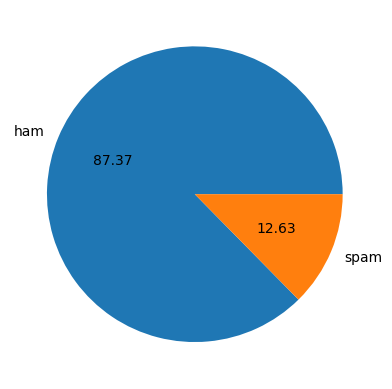

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head(1)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Download it first with: python -m spacy download en_core_web_sm
df['num_words'] = df['text'].apply(lambda x: len([token for token in nlp(x) if token.is_alpha]))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,21
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Make sure this model is installed

# Add a sentence count column
df['num_sentences'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))


In [ ]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,14.414200,2.100987
std,58.236293,10.380365,1.456628
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,20.000000,3.000000
max,910.000000,167.000000,27.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,13.655226,1.961913
std,56.358207,10.680606,1.400953
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,10.000000,2.000000
75%,90.000000,18.000000,2.000000
max,910.000000,167.000000,27.000000


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,19.663093,3.062787
std,30.137753,5.704895,1.471835
min,13.000000,0.000000,1.000000
25%,132.000000,17.000000,2.000000
50%,149.000000,21.000000,3.000000
75%,157.000000,23.000000,4.000000
max,224.000000,33.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

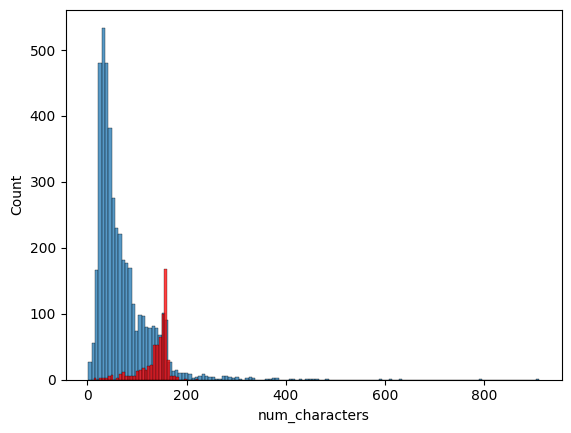

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

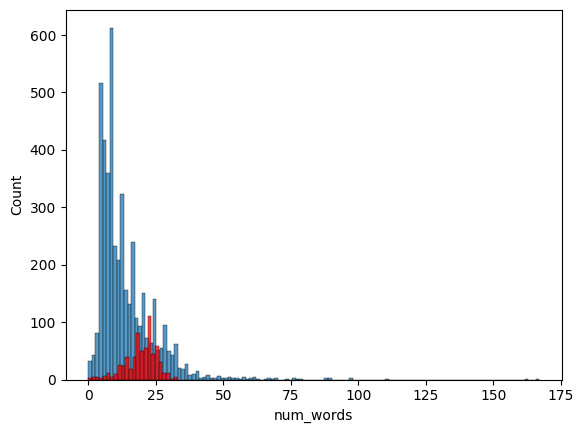

In [ ]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

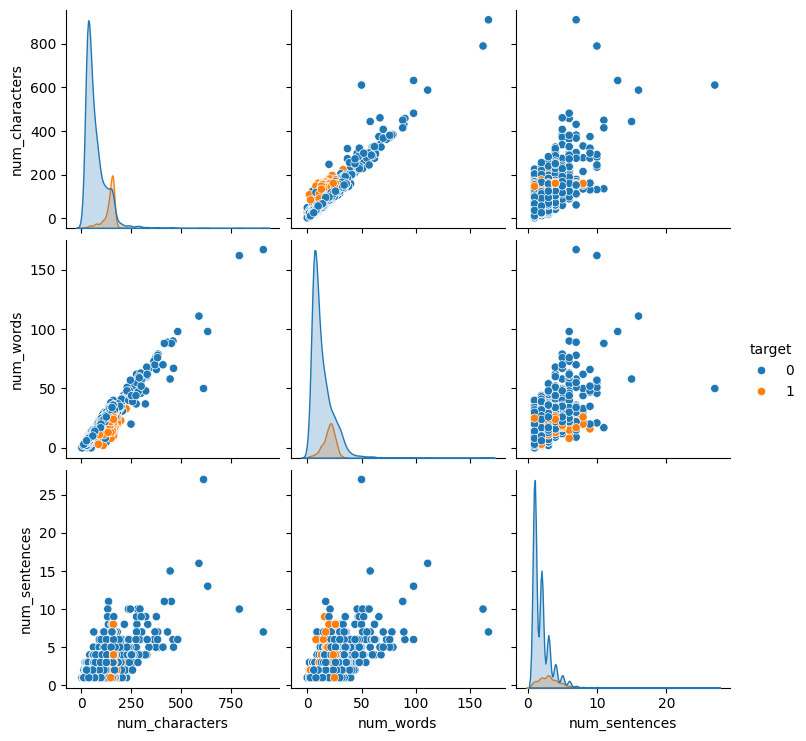

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

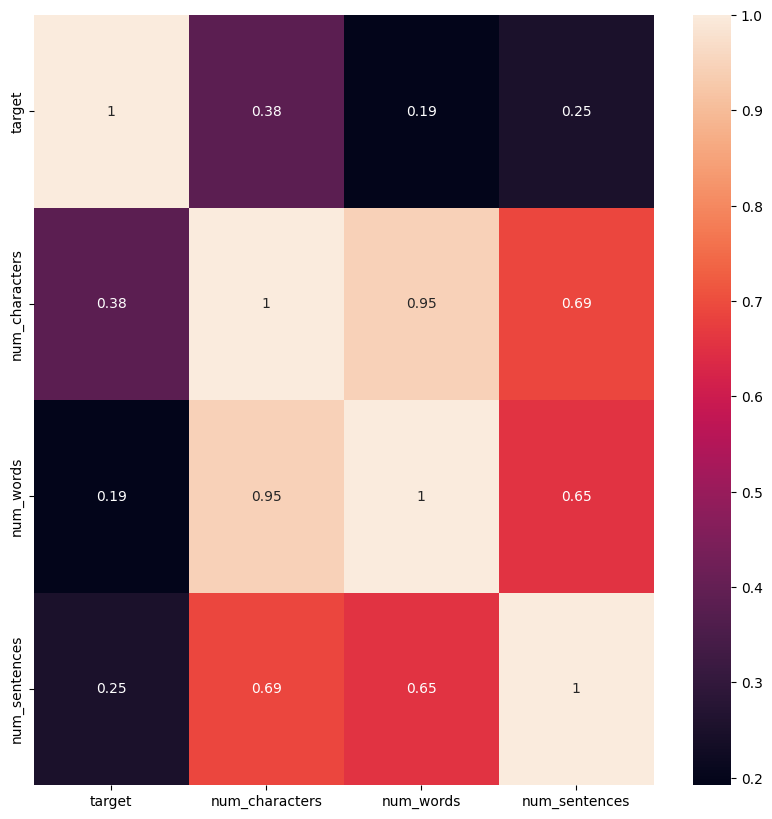

In [ ]:
figsize = (10,10)
plt.figure(figsize=figsize)
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

**Model Building**

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,21,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = pd.DataFrame(model.encode(df['text'].tolist(), show_progress_bar=True))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
df_embeddings = pd.DataFrame(embeddings)

# Optionally concatenate with original df
df_combined = pd.concat([df, df_embeddings], axis=1)

# Preview result
df_embeddings.head(1)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.016918,-0.038168,0.071486,-0.057344,-0.086663,0.046523,0.060178,-0.023835,0.060663,-0.070544,...,0.068599,-0.032442,-0.016695,0.06084,0.070802,0.020197,0.034244,-0.062165,-0.073569,-0.001257


In [ ]:
X = df_embeddings
y = df['target']

In [ ]:
X.shape

(5169, 384)

In [ ]:
y.shape

(5169,)

In [ ]:
y.head(1)

,target
0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score,
    recall_score, roc_auc_score
)
import pandas as pd

# Optional: Import XGBoost and LightGBM if available
try:
    from xgboost import XGBClassifier
except ImportError:
    XGBClassifier = None

try:
    from lightgbm import LGBMClassifier
except ImportError:
    LGBMClassifier = None

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training Metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_precision = precision_score(y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        train_roc_auc = roc_auc_score(y_train, y_train_pred)

        # Test Metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)
        test_roc_auc = roc_auc_score(y_test, y_test_pred)

        print(f"\n📘 Model: {name}")
        print("🔹 Training Set:")
        print(f"- Accuracy: {train_accuracy:.4f}")
        print(f"- F1 Score: {train_f1:.4f}")
        print(f"- Precision: {train_precision:.4f}")
        print(f"- Recall: {train_recall:.4f}")
        print(f"- ROC AUC Score: {train_roc_auc:.4f}")

        print("🔹 Test Set:")
        print(f"- Accuracy: {test_accuracy:.4f}")
        print(f"- F1 Score: {test_f1:.4f}")
        print(f"- Precision: {test_precision:.4f}")
        print(f"- Recall: {test_recall:.4f}")
        print(f"- ROC AUC Score: {test_roc_auc:.4f}")
        print("="*60)

        # Append result
        results.append({
            "Model": name,
            "Test Accuracy": test_accuracy,
            "Test F1": test_f1,
            "Test Precision": test_precision,
            "Test Recall": test_recall,
            "Test ROC AUC": test_roc_auc
        })

    # Convert to DataFrame and sort
    results_df = pd.DataFrame(results)
    best_model_row = results_df.sort_values(by="Test F1", ascending=False).iloc[0]
    print("\n✅ BEST MODEL BASED ON TEST F1 SCORE:")
    print(best_model_row)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "SVM (RBF)": SVC(kernel='rbf', probability=True)
}

# Add XGBoost if available
if XGBClassifier:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Add LightGBM if available
if LGBMClassifier:
    models["LightGBM"] = LGBMClassifier()

# Run evaluation
evaluate_models(models, X_train, X_test, y_train, y_test)


📘 Model: Logistic Regression
🔹 Training Set:
- Accuracy: 0.9843
- F1 Score: 0.9839
- Precision: 0.9891
- Recall: 0.8835
- ROC AUC Score: 0.9411
🔹 Test Set:
- Accuracy: 0.9778
- F1 Score: 0.9772
- Precision: 0.9675
- Recall: 0.8623
- ROC AUC Score: 0.9289

📘 Model: K-Nearest Neighbors
🔹 Training Set:
- Accuracy: 0.9855
- F1 Score: 0.9856
- Precision: 0.9252
- Recall: 0.9612
- ROC AUC Score: 0.9751
🔹 Test Set:
- Accuracy: 0.9749
- F1 Score: 0.9754
- Precision: 0.8684
- Recall: 0.9565
- ROC AUC Score: 0.9671

📘 Model: Decision Tree
🔹 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
🔹 Test Set:
- Accuracy: 0.9449
- F1 Score: 0.9444
- Precision: 0.8045
- Recall: 0.7754
- ROC AUC Score: 0.8732

📘 Model: Random Forest
🔹 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
🔹 Test Set:
- Accuracy: 0.9681
- F1 Score: 0.9662
- Precision: 1.0000
- Recall: 0.7609
- ROC AUC Sc

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📘 Model: XGBoost
🔹 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
🔹 Test Set:
- Accuracy: 0.9836
- F1 Score: 0.9832
- Precision: 0.9919
- Recall: 0.8841
- ROC AUC Score: 0.9415
[LightGBM] [Info] Number of positive: 515, number of negative: 3620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124547 -> initscore=-1.950062
[LightGBM] [Info] Start training from score -1.950062

📘 Model: LightGBM
🔹 Training Set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
🔹 Test Set:
- Accuracy: 0.9836
- F1 Score: 0.9831
- Precision: 1.0000
- Recall: 0.8768
- ROC AUC Score: 0.9384

✅ BEST MODEL BASED

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Linear SVM model
svm_linear = SVC(kernel='linear')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 Score
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from CV:", grid_search.best_score_)

# Evaluate the best model on test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 1}
Best F1 Score from CV: 0.9423109845858987

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       896
           1       0.97      0.93      0.95       138

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



<Figure size 800x500 with 0 Axes>

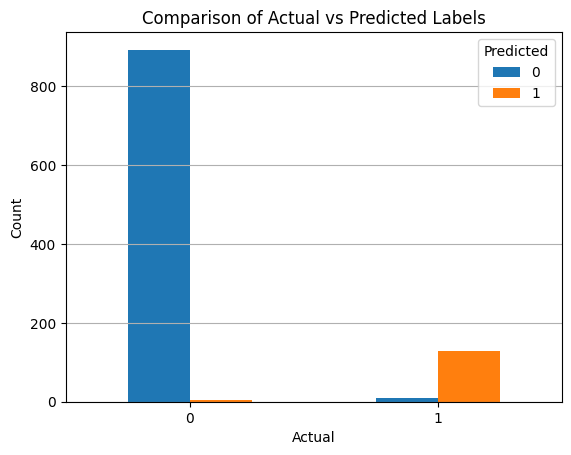